# Audits - Are Companies Resorting to Fraud?

### **Introduction**

Frauds are a widespread issue within many industries that can have devastating impacts on our economy if went unnoticed (Reurink, 2018). 

This is where the task of auditors becomes of great significance. Audits are impartial, thorough inspections of companies’ reported financial statements with the ultimate goal of verifying their accuracy. The auditor then makes a final judgment of the financial claim by taking into consideration factors such as the companies' reputation history to determine whether they've been reported in "good faith" and are error-free, representing the exact financial state of the company - or if they have been misrepresented in one form or another.

Financial claims are created internally by the firm itself. Therefore, the risk of mis-statements, either by accidental misrepresentation such as mere accounting errors, or intentional manipulation by the company itself are extant. Manipulations of financial claims are made by fraudulent firms to make their company appear 'stronger' than its current state. For instance, companies may overstate their revenues and assets, while coupling this with under-reporting their yearly losses to encourage investors to pour money and resources into their company.

With the above considered, it is imperative as an auditor to be meticulous to ensure ethical business practices are upheld. Due to this, auditing offices have begun looking into machine-learning algorithms aiding auditors in deciding if a company has reported fraudulent financial claims. Being able to detect fraud efficiently and accurately is beneficial to many governing bodies as well as the general public as it ensures that the stability of markets and the economy is not undermined (Li et al., 2021; Zhu et al., 2021).

Given this context, the question we will attempt to address in this analysis is:

Has a given company resorted to fraud or not given various data that can be used as predictor variables in our k-nearest neighbor classification algorithm?

The dataset to train our classification model is sourced from the Audit Office of India (Hooda et al., 2018).

### **Methods and Results**

**Loading and Importing Required Packages**

The appropriate packages were loaded via `library()` to perform functions for the k-nearest neighbour classification algorithm.

In [13]:
# Import libraries and packages
library(tidyverse)
library(tidymodels)
library(repr)

**Download and Read data**

The zip file containing the data located at the url was downloaded from the web via `download.file()`. The `.zip` file was then unzipped into the `audit_data` directory using the `unzip()` function. Finally, `read.csv()` read the `.csv` file into R and this was assigned to the `audit_data` variable.

To get a snapshot of the data, `head()` was employed. 

In [14]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00475/audit_data.zip"
download.file(url, "audit_data.zip")
unzip("audit_data.zip")
audit_data <- read.csv("audit_data/audit_risk.csv")

head(audit_data, n = 10)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,⋯,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,⋯,0.4,0,0.2,0,2.4,8.574,0.4,0.5,1.7148,1
2,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,⋯,0.4,0,0.2,0,2.0,2.554,0.4,0.5,0.5108,0
3,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,⋯,0.4,0,0.2,0,2.0,1.548,0.4,0.5,0.3096,0
4,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,⋯,0.4,0,0.2,0,4.4,17.530,0.4,0.5,3.5060,1
5,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,⋯,0.4,0,0.2,0,2.0,1.416,0.4,0.5,0.2832,0
6,3.89,6,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5.0,⋯,0.4,0,0.2,0,2.0,2.156,0.4,0.5,0.4312,0
7,3.89,7,1.10,0.4,0.440,7.41,0.4,2.964,8.51,5.0,⋯,0.4,0,0.2,0,3.2,31.774,0.4,0.5,6.3548,1
8,3.89,8,8.50,0.6,5.100,12.03,0.6,7.218,20.53,5.5,⋯,0.4,0,0.2,0,4.2,18.034,0.4,0.5,3.6068,1
9,3.89,8,8.40,0.6,5.040,11.05,0.6,6.630,19.45,5.5,⋯,0.4,0,0.2,0,4.2,17.206,0.4,0.5,3.4412,1


**Table 1: Comprehensive Audit Data Frame**

The first 10 rows of observations from our unwrangled Audit dataframe. 

**Choosing Predictor Variables of Interest**

The two predictor variables were chosen after critical analysis of their meanings. For example, "Inherent risk" is the risk of financial misstatements caused by factors other than simple unintended accounting errors. A struggling company would be more incentivized to misreport its financial state in order to save face, possessing a higher inherent risk. According to Hooda et al. (2018), a case study on fraudulent firm classifications, cash transactions are less likely to be traced compared to their cheque counterparts, and thus, fraudulent companies frequently resorting to cash transactions possess a higher inherent risk.

Our other predictor variable, "Money value" is the quantity of money involved in financial misstatements from the firm in past audit inspections. This predictor variable is tightly linked to a company's reputation history, which therefore, could be an indicator of how likely their present financial claims are to be fraudulent (Hooda et al., 2018). Additionally, a study by Lokanan and Sharma (2022) analyzing the use of machine learning in detecting fraudulent business endeavours concluded the amount of money invested in financial misstatements to be a significant predictor of fraud.

**Clean and Wrangle data**

The dataset fit criteria of tidy dataframe. In addition, it contained appropriate column names and no metadata - therefore, skip was not employed. The target variable (Risk) was converted from a character data type into a factor using `as_factor()` and `mutate()` to suit its categorical nature. The columns of our predictors and response variable were selected and missing values were omitted using `na.omit()` to result in a final cleaned and wrangled dataset.


In [15]:
# Clean and wrangle data
audit_data <- audit_data |>
    mutate(Risk = as_factor(Risk)) |>
    select(Inherent_Risk, Money_Value, Risk) |>
    na.omit(audit_data)
 
head(audit_data)

,Inherent_Risk,Money_Value,Risk
,<dbl>,<dbl>,<fct>
1,8.574,3.38,1
2,2.554,0.94,0
3,1.548,0.00,0
4,17.530,11.75,1
5,1.416,0.00,0
6,2.156,2.95,0


**Table 2: Updated Audit Data Frame With Predictor Variables of Interest**

Table displaying first 6 rows of wrangled audit data containing only predictor variables of interest and our target variable (Risk). 

**Splitting the Data**

`initial_split()` was used to split our `audit_data` into a training subset to teach our classification model, and a testing subset used to evaluate the prediction accuracy of the final tuned model.`Strata` was set to Risk. Data was split using `prop` = 70, meaning 70% of the data was allocated to the training subset with the remaining 30% being allotted to the testing subset.

This step is necessary since to receive an accurate evaluation of the prediction quality of our model, it needs to predict labels on a dataset it has not seen before during the training process, this being, the testing subset. If the training set was utilized to both train and evaluate the accuracy of our classifier, this would overestimate its accuracy.

In [16]:
set.seed(3500)

#The seed was set for reproducibility of our analysis while simultaneously maintaining the random nature of tasks 

# Split into training and testing subsets
audit_split <- initial_split(audit_data, prop = 0.70, strata = Risk) 
audit_training <- training(audit_split)
audit_testing <- testing(audit_split)

**Data Summary**

To summarize our dataset as a part of exploratory data analysis, `group_by()` and `summarize()` counted the number of observations corresponding to each class label of the target variable in the training subset to confirm a significant class imbalance did not exist as this could interfere with our predictor model's quality. 

In addition, an average of our two predictor variables was computed as part of the summary. An observation with values higher than these averages would likely be labeled as fraudulent and vice versa. This can therefore be used as a supplementary means of evaluating the prediction accuracy of our model on specific observations. 

In [17]:
set.seed(3500)

# Data Summary 
audit_training |>
    group_by(Risk) |>
    summarize(count = n())

audit_training |>
    select(Inherent_Risk, Money_Value) |>
    map(mean, na.rm = TRUE)

Risk,count
<fct>,<int>
0,329
1,213


$Inherent_Risk
[1] 16.28185

$Money_Value
[1] 11.43416

**Table 3: Number of Fraudulent Companies and Predictor Variable Means**

The table shows the number of companies that are fraudulent (1) and non-fraudulent (0) in the training subset. 

Below is the means associated with our predictor variables.

**Data Visualization**

A scatterplot of our predictor variables was created with `ggplot()` and coloured by the risk label.  

A logarithmic scale was used for the predictor variables axes, as our observations took on very large and small values of our predictor variables. If the log scale was not being employed, distinct single observations would have been impossible to notice from the graph due to the high clustering of points in two extremely condensed spaces.

Warning message:
“Transformation introduced infinite values in continuous x-axis”


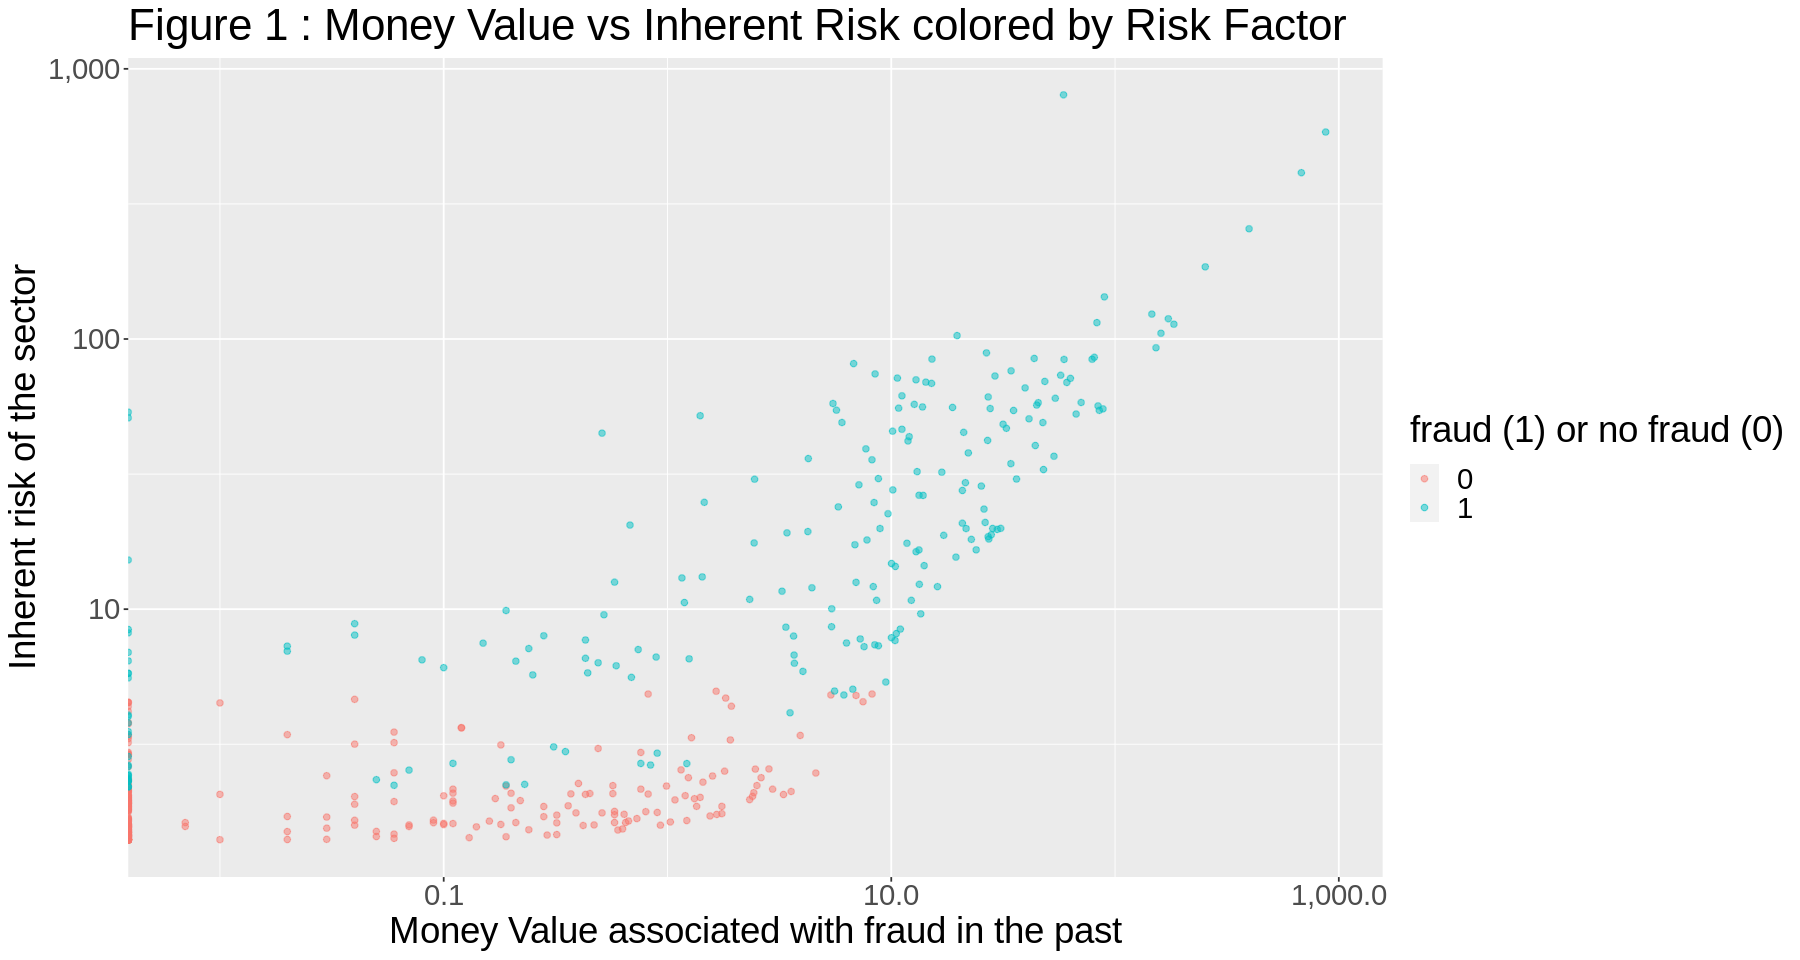

In [18]:
set.seed(3500)

# Visualization
options(repr.plot.width = 15, repr.plot.height = 8)

audit_visual <- audit_training |> 
ggplot(aes(x = Money_Value, y = Inherent_Risk, color = Risk)) +
    geom_point(alpha = 0.5) + 
    labs(x = "Money Value associated with fraud in the past",
         y = "Inherent risk of the sector", 
         color = "fraud (1) or no fraud (0)") +
    ggtitle("Figure 1 : Money Value vs Inherent Risk colored by Risk Factor") +
    scale_y_log10(labels = comma) + 
    scale_x_log10(labels = comma) +
    theme(text = element_text(size = 22))

audit_visual

**Graph 1: Visualization of Money Value plotted against Inherent Risk colored by the Risk Factor**

This graph confirmed our intuition that fraudulent companies possess higher inherent risk values and money value than their non fraudulent counterparts. 

**Preprocess training data**

A recipe was created to preprocess our predictor variables by standardizing (centering and scaling) them to ensure contribution of equal shares to the euclidean distance calculation between observations. Hence, preventing variables with larger ranges to dominate distance calculations. 

Then,'Risk' was specified as the target variable. As the predictors of interest have been selected for, it was safe to specify all other variables as predictors.  

In [19]:
set.seed(3500)
# Preprocess data
audit_recipe <- recipe(Risk ~ Inherent_Risk + Money_Value, data = audit_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) 

#### Model Tuning

Model tuning is performed via a 5-fold cross validation to find the k `neighbors` value with the highest prediction accuracy. Cross validation ensures that any one “random” validation set does not influence the reported accuracy too greatly by taking an average of the accuracy values across the different folds where each fold has a distinct validation set.

A dataframe `k_vals` was created containing reasonable values of K to be tested.

Model specification was created while declaring the k parameter and settings we wish to use. With`nearest_neighbor()`, the `weight_func` was set to rectangular to ensure each neighbor received one vote when predicting labels for an observation. `Tune()` was used as the argument for the `neighbors` function so the accuracy for each parameter value to be tested was computed. `set_engine()` specified the computational engine “kknn”, and `set_mode()` specified our classification problem. 

Finally, `workflow()` combined our recipe and model specification. The model was fitted for each testable parameter value using the `tune_grid()` function while specifying our 5-fold cross validation object for the 'resamples' argument and the `k_vals` data frame for the grid argument. This ensures that cross-validation is performed for each value of K to obtain an unbiased accuracy value for each. 

Metrics for the cross-validation process were collected and accuracy values were filtered for in the `.metric` column and arranged to determine the K value with the highest accuracy.

In [20]:
set.seed(3500)

# Model Tuning
audit_vfold <- vfold_cv(audit_training, v = 5, strata = Risk)

k_vals <- tibble(neighbors = seq(from = 3, to = 21, by = 2))

# Specify the model
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
set_engine("kknn") |>
set_mode("classification")

# Combine recipe, model, grid search, and return metrics
knn_results <- workflow() |>
  add_recipe(audit_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = audit_vfold, grid = k_vals) |>   
  collect_metrics() 

# Filter metric accuracy
accuracies <- knn_results |>
    filter(.metric == "accuracy")|>
    arrange(desc(mean))

accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
13,accuracy,binary,0.9409594,5,0.005519996,Preprocessor1_Model06
17,accuracy,binary,0.9391245,5,0.003652201,Preprocessor1_Model08
15,accuracy,binary,0.9372897,5,0.008382996,Preprocessor1_Model07
19,accuracy,binary,0.9372897,5,0.004446777,Preprocessor1_Model09
3,accuracy,binary,0.9355058,5,0.013887468,Preprocessor1_Model01
11,accuracy,binary,0.9354035,5,0.005876213,Preprocessor1_Model05
21,accuracy,binary,0.9336199,5,0.006000921,Preprocessor1_Model10
9,accuracy,binary,0.9242914,5,0.009564782,Preprocessor1_Model04
5,accuracy,binary,0.9207416,5,0.011731657,Preprocessor1_Model02


**Table 4: K Neighbours and Associated Accuracies**

Table displaying accuracy values in descending order associated with different neighbor values - K = 13 having the highest accuracy. 

**Visualizing the K Nearest Neighbor Values and their Associated Accuracies**

To visualize the results of our tuning process, a line plot was constructed with various K values on the x-axis and the accuracy value for each K on the y-axis .

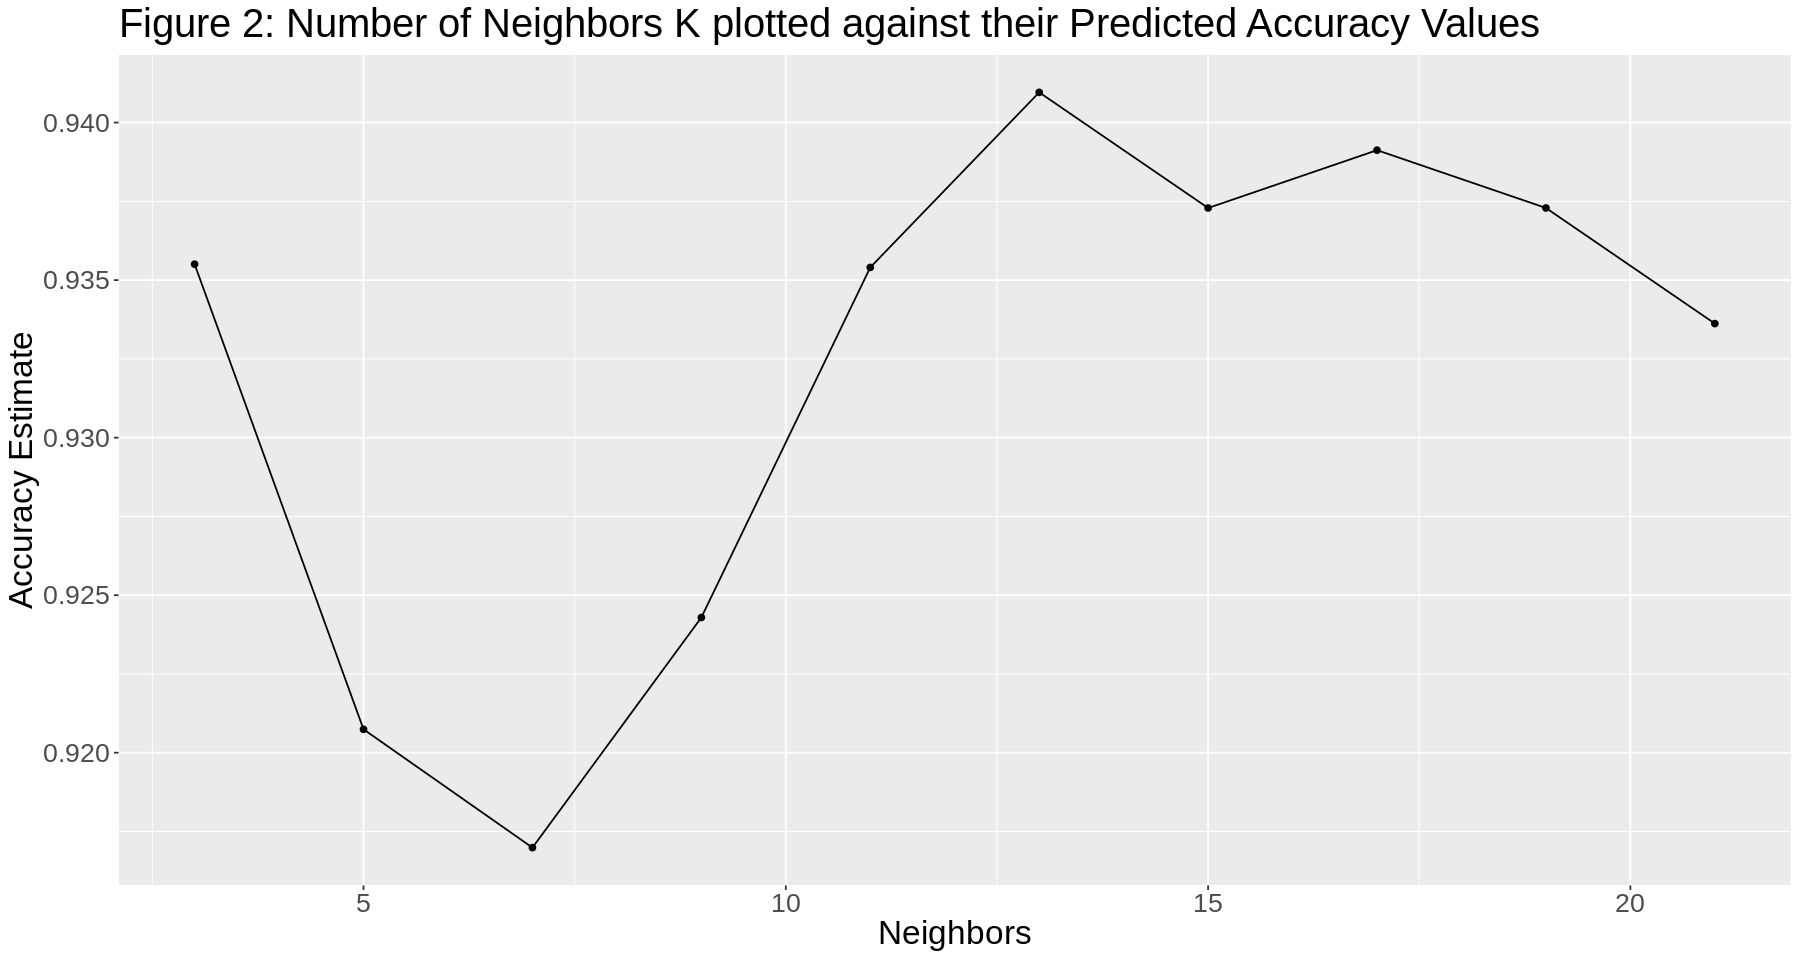

In [21]:
set.seed(3500)

#Making k plot
cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    ggtitle("Figure 2: Number of Neighbors K plotted against their Predicted Accuracy Values") +
    theme(text = element_text(size = 20))
    cross_val_plot

options(repr.plot.width = 30, repr.plot.height = 8)

**Graph 2: Accuracy as a Function of K Neighbors Line Plot**

Visualization of the results from the accuracy table above. As seen, the highest accuracy peak occurs when K equals 13. 


**Evaluating Tuned Model Accuracy on Testing Data**

After determining our number of neighbors (13), we assessed the quality of our tuned classifier on the 'testing' subset.

To accomplish this, our tuned model was retrained on the entire training set where `neighbors` = 13. The model was fitted to predict labels for the testing subset after establishing a workflow. Accuracy metrics were collected after having specified the true labels and predicted labels of 'Risk'. 

The model's accuracy was scrutinized to determine whether its accuracy was reliable in the context of our application using the `conf_mat` (confusion matrix) function, which visualizes the error types our model made.

In [22]:
set.seed(3500)

# Evaluating Tuned Model Accuracy on Testing Data
audit_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 13)|>
  set_engine("kknn") |>
  set_mode("classification")

audit_fit <- workflow() |>
  add_recipe(audit_recipe) |>
  add_model(audit_spec) |>
  fit(data = audit_training)

audit_summary <- predict(audit_fit, audit_testing)  |>
  bind_cols(audit_testing) |>
  metrics(truth = Risk, estimate = .pred_class) |>
  filter(.metric == "accuracy")

audit_confmat <- predict(audit_fit, audit_testing)  |>
  bind_cols(audit_testing) |>
  conf_mat(truth = Risk, estimate = .pred_class) 

In [23]:
head(audit_summary)

audit_confmat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9484979


          Truth
Prediction   0   1
         0 136   7
         1   5  85

**Table 5: Model Accuracy and Confusion Matrix Table**

This reveals our classification model is 94.85% accurate in predicting the fraudulent state of a company. 

The confusion matrix finds 7 firms labeled as non-fraudulent were actually fraudulent, and 5 firms labeled as fraudulent were not fraudulent. The latter case is not as concerning since further investigations in the auditing process have the potential to verify the firm is non-fraudulent. However, labeling a fraudulent company as non-fraudulent can have serious economical ramifications since it enables the company to financially exploit without legal measures being applied.

### **Discussion**
**Summary of Results**

The ultimate finding of this analysis was analyzing our classifier model's effectiveness in making accurate predictions on unseen observations to determine whether a given company was fraudulent or not.   

Our analysis concluded 136 observations were correctly predicted as non-fraudulent and 85 observations were correctly predicted as fraudulent. However, our model inaccurately predicted 12 observations resulting in a 94.85% classification accuracy. 


**Expected Outcomes**

Before the analysis, we predicted our tuned model would have moderate prediction accuracy but we were slightly taken back by a 94.85% accuracy. In addition, the K values tested in our training process had relatively high accuracy values and only a 2.4% accuracy value disparity between the best neighbor and worst neighbor values. However, the extent of this surprise was tempered through further analyzing figure 1. 

To elaborate, few observations had relatively equal numbers of both fraudulent and non-fraudulent observations as their neighbours, whereas most observations could easily be predicted by examining the graph alone. This is due to the dataset's nature where fraudulent observations clustered largely in the graph's top right portion whereas non-fraudulent points occupied the bottom left. Thus, rationalizing our model's accuracy.

**Impact:**

Our contextual findings contribute to the existing literature on audits conducted by the Government of India and has the potential to promote more research in this area.

Our model could inspire the building of similar models operating globally to emancipate economies and individuals from financial strains imposed by fraudulent activities. An estimated total of US $5.127 trillion is lost on an international scale due to final misstatements by companies going unnoticed (Crowe Global, 2019). Developing an accurate algorithm to detect fraud could alleviate this financial loss. 


**Future Questions:**

How much will machine-based algorithms aid in reducing fraud worldwide? Namely, what is the percentage decrease in financial loss arising from fraud after the emergence of predictor models?  

### **References**

Crowe Global. (December 7, 2019). Fraud costs the global economy over US 5 trillion. Retrieved from https://www.crowe.com/global/news/fraud-costs-the-global-economy-over-us$5-trillion 

Li, X., Kim, J.B., Wu, H., Yu, Y. (2021). Corporate Social Responsibility and Financial Fraud: The Moderating Effects of Governance and Religiosity. Journal of Business Ethics, 170(3), 557-576. DOI: 10.1007/s10551-019-04378-3

Lokanan, M.E., Sharma, K. (2022). Fraud prediction using machine learning: The case of investment advisors in Canada. Machine Learning with Applicaions, 8(15), DOI: 10.1016/j.mlwa.2022.100269

Hooda, N., Bawa, S., & Rana, P.S.(2018).Fraudulent Firm Classification: A Case Study of an External Audit. Applied Aritifical Intelligence, 32(1), 48-64. DOI: 10.1080/08839514.2018.1451032

Reurink, A. (2018). Financial Fraud: A Literature Review. Journal of Economic Surveys, 32(5), 1292-1325. DOI: 10.1111/joes.12294 

Zhu, X., Ao, X., Qin, Z., Chang, Y., Liu, Y., He, Q., Li, J. (2021). Intelligent financial fraud detection practices in post-pandemic era. The Innovation, 2(4), 1-11. DOI: 10.1016/j.xinn.2021.100176


